# Introdução

Esse notebook tem o intuito de realizar a análise da relações de diversos dados de clientes com o fato de serem inádimplentes ou não.

O objetivo da anáçose é encontrar uma forma de identificar possiveis clientes que possam deixar de pagar suas despesas para com o banco.

## Dados Utilizados

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



# Obtenção dos dados

## Importação dos Módulos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Obtenção do Dataframe

In [ ]:
df = pd.read_csv("Arq_Inadimplentes.csv", na_values="na")

# Análise do Schema do Dataframe

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [ ]:
print(f"Quantidade total de dados: {qtd_total}")
print(f"Quantidade total de clientes adimplentes: {qtd_adimplentes}")
print(f"Quantidade total de clientes inadimplentes: {qtd_inadimplentes}")

Quantidade total de dados: 10127
Quantidade total de clientes adimplentes: 8500
Quantidade total de clientes inadimplentes: 1627


In [ ]:
print(f"Porcentagem de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"Porcentagem de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

Porcentagem de clientes adimplentes é de 83.93%
Porcentagem de clientes inadimplentes é de 16.07%


In [ ]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Abaixo podemos ver que a base de dados contém dados que estão no tipo errado, com isso é necessário fazer a correção desses dados para seguir com a análise.

In [ ]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Também é possivel perceber que o dataframe possui colunas com dados faltantes, será feita a análise de impacto desses dados em toda a base de dados para entender melhor qual será o próximo passo.

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

## Correção dos dados

Para corrigir o tipo dos dados irei uitilizar uma função `lambda`.

In [ ]:
corrigir = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['limite_credito'] = df['limite_credito'].apply(corrigir)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(corrigir)

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

## Limpeza dos dados

### Impacto da exclusão das linhas com dados vazios

In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2),}}
      stats_dados_faltantes.append(dict_dados_faltantes)
  print("Quantidade de Dados Faltantes por Coluna:")
  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
dados_faltantes = df.isna().sum(axis=1).sum()
print(f"Quantidade de linhas com dados faltantes: {dados_faltantes} \nProporção de dados faltantes: {round(dados_faltantes/qtd_total,2)*100}%")

Quantidade de linhas com dados faltantes: 3380 
Proporção de dados faltantes: 33.0%


Quantidade de dados faltantes total

In [ ]:
stats_dados_faltantes(df=df)

Quantidade de Dados Faltantes por Coluna:
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


Quantidade de dados faltantes em clientes adimplentes

In [ ]:
stats_dados_faltantes(df=df[df['default'] == 0])

Quantidade de Dados Faltantes por Coluna:
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


Quantidade de dados faltantes em clientes inadimplentes

In [ ]:
stats_dados_faltantes(df=df[df['default'] == 1])

Quantidade de Dados Faltantes por Coluna:
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


### Exclusão dos dados faltantes

In [ ]:
df.dropna(inplace=True)

Nova visualização das colunas

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Novo schema do Dataframe

In [ ]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A nova proporcão de clientes adimplentes é de 84.28%

A nova proporcão de clientes inadimplentes é de 15.72%


# Visualização dos Dados

Com os dados prontos, irei iniciar a visualização dos dados dos clientes inadimplentes com os dos clientes adimplentes

In [ ]:
sns.set_style("whitegrid") # Configurando o gráfico para fundo branco com grades

In [ ]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

## Gráficos dos dados categóricos

In [ ]:
def criar_graficos_categoricos(coluna: str, titulos: list):
  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    for p in f.patches:
          f.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()


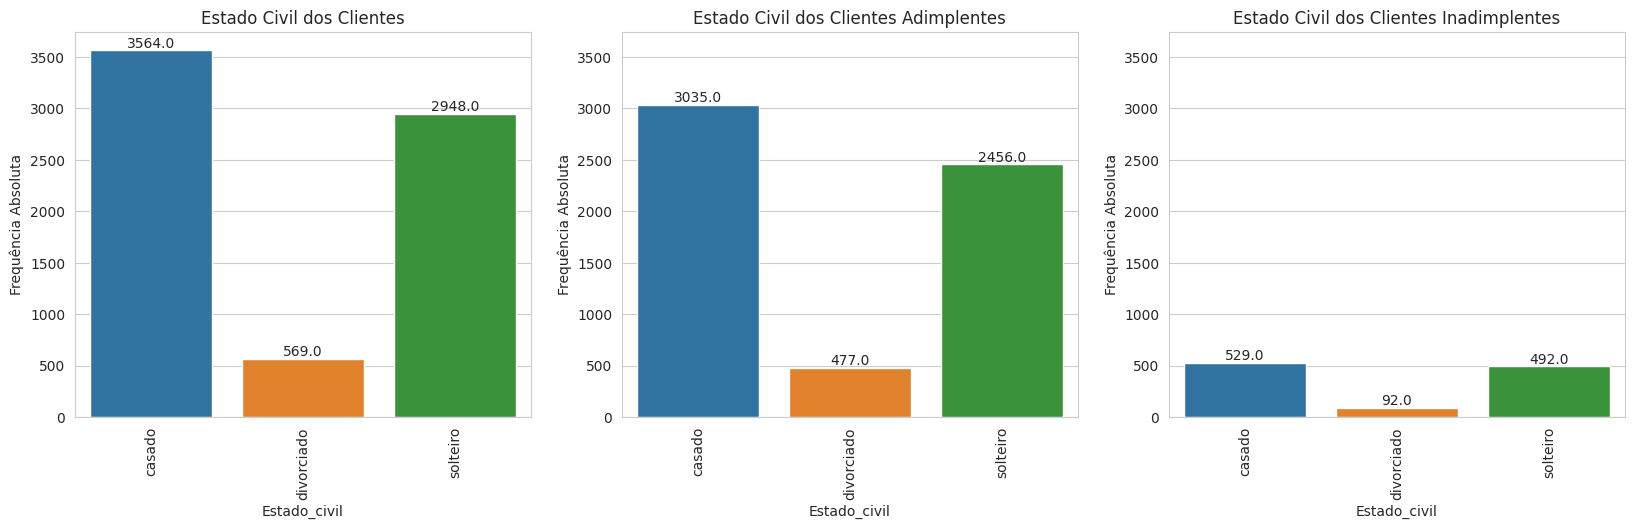

In [ ]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']
criar_graficos_categoricos(coluna=coluna, titulos=titulos)

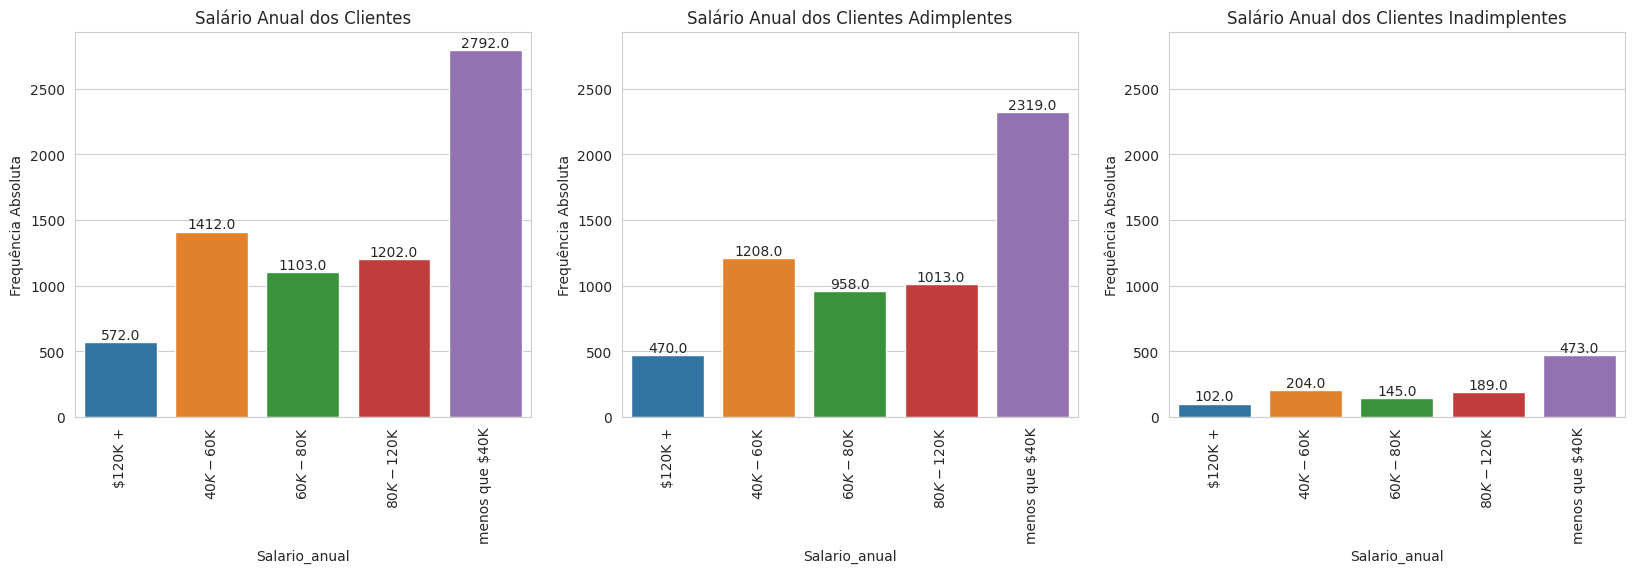

In [ ]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']
criar_graficos_categoricos(coluna=coluna, titulos=titulos)

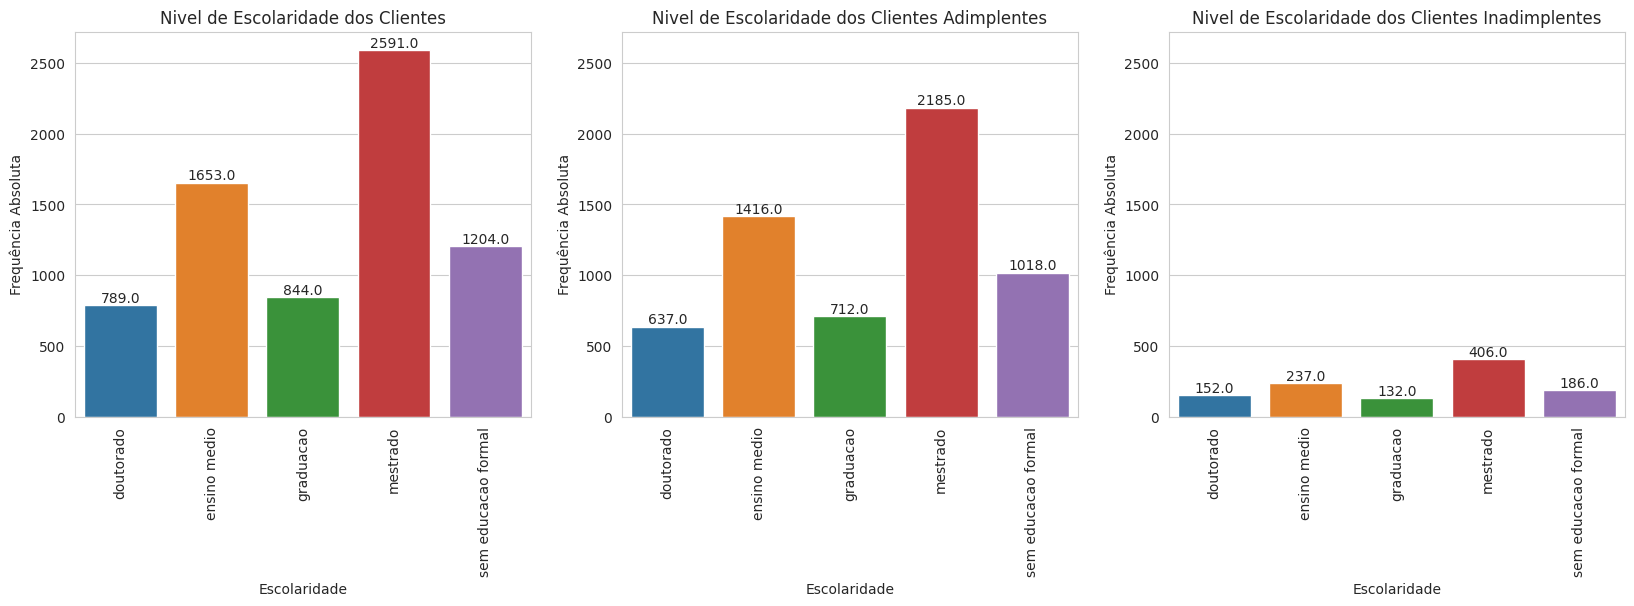

In [ ]:
coluna = 'escolaridade'
titulos = ['Nivel de Escolaridade dos Clientes', 'Nivel de Escolaridade dos Clientes Adimplentes', 'Nivel de Escolaridade dos Clientes Inadimplentes']
criar_graficos_categoricos(coluna=coluna, titulos=titulos)

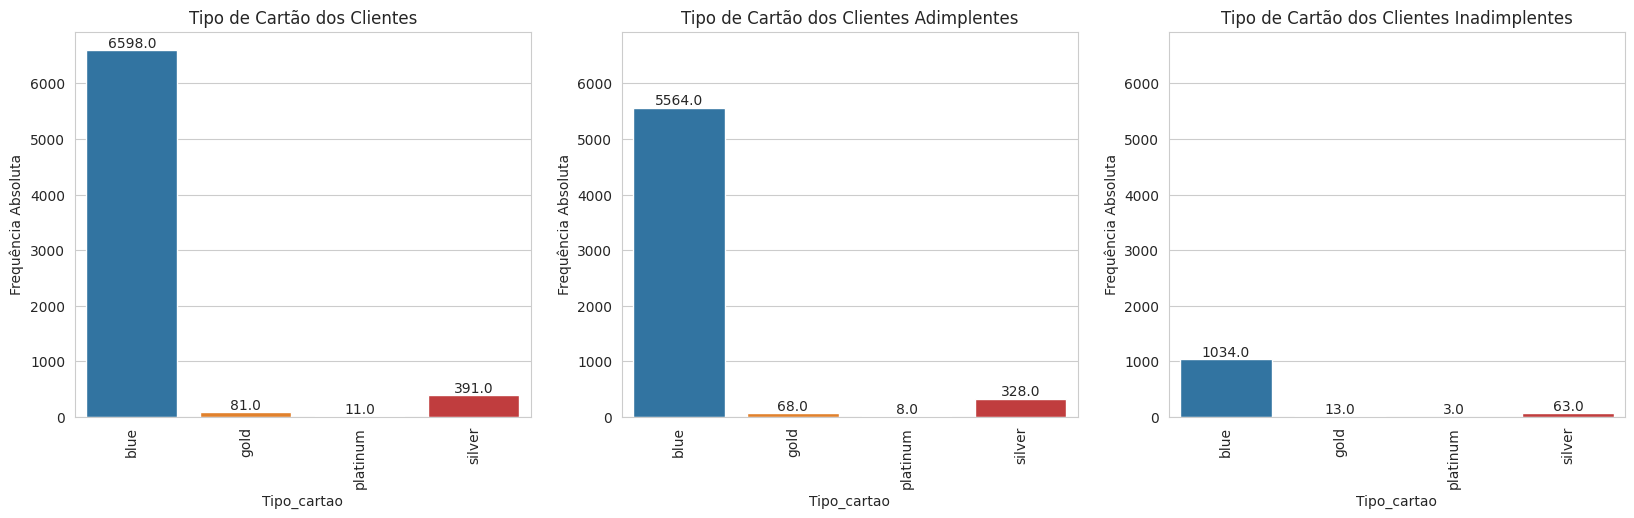

In [ ]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']
criar_graficos_categoricos(coluna=coluna, titulos=titulos)

### Resultados da análise dos gráficos - Dados Categóricos

Por meio dos gráficos, pudemos perceber que não é possivel traçar uma relação confiável entre as caracteristicas categóricas (escolaridade, estado civil, salario anual e tipo de cartão) com o fato do cliente ter ou não uma maior possibilidade de se tornar inadimplente

## Gráficos dos dados numéricos

In [125]:
def criar_graficos_numericos(coluna: str, titulos: list, rotulos: bool):
  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    if(rotulos):
      for p in f.patches:
              x = p.get_x() + p.get_width() / 2
              height = p.get_height()
              f.annotate(f'{x:.0f}', (x, height), ha='center', va='bottom')

    eixo += 1

  figura.show()



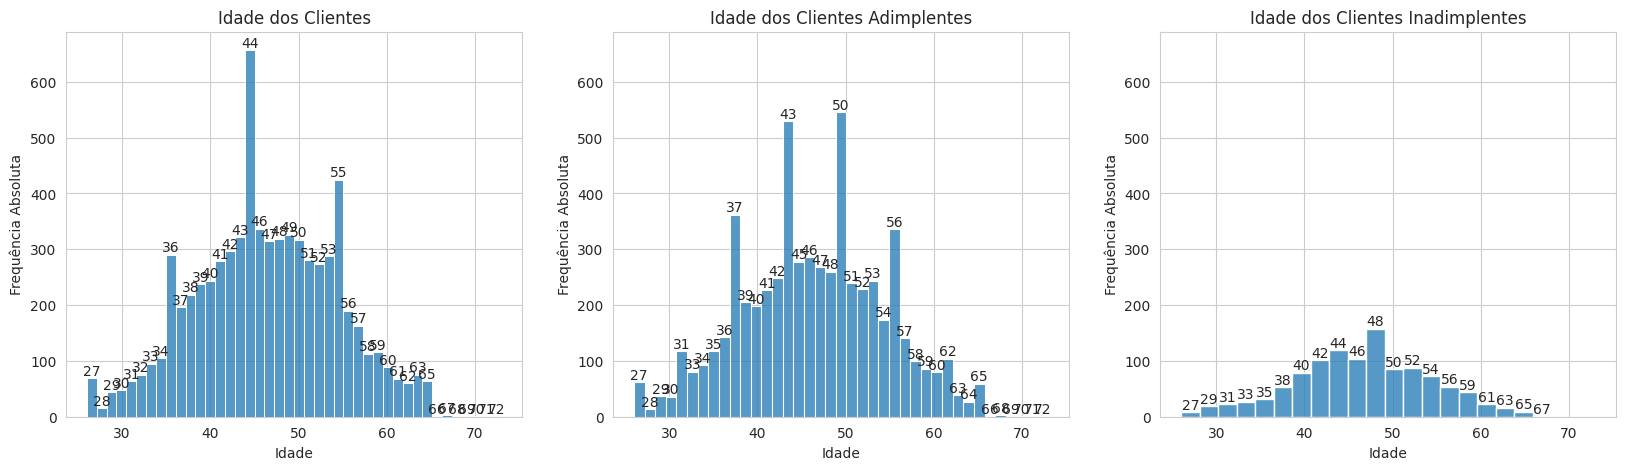

In [127]:
coluna = 'idade'
titulos = ['Idade dos Clientes', 'Idade dos Clientes Adimplentes', 'Idade dos Clientes Inadimplentes']
criar_graficos_numericos(coluna=coluna, titulos=titulos, rotulos=True)

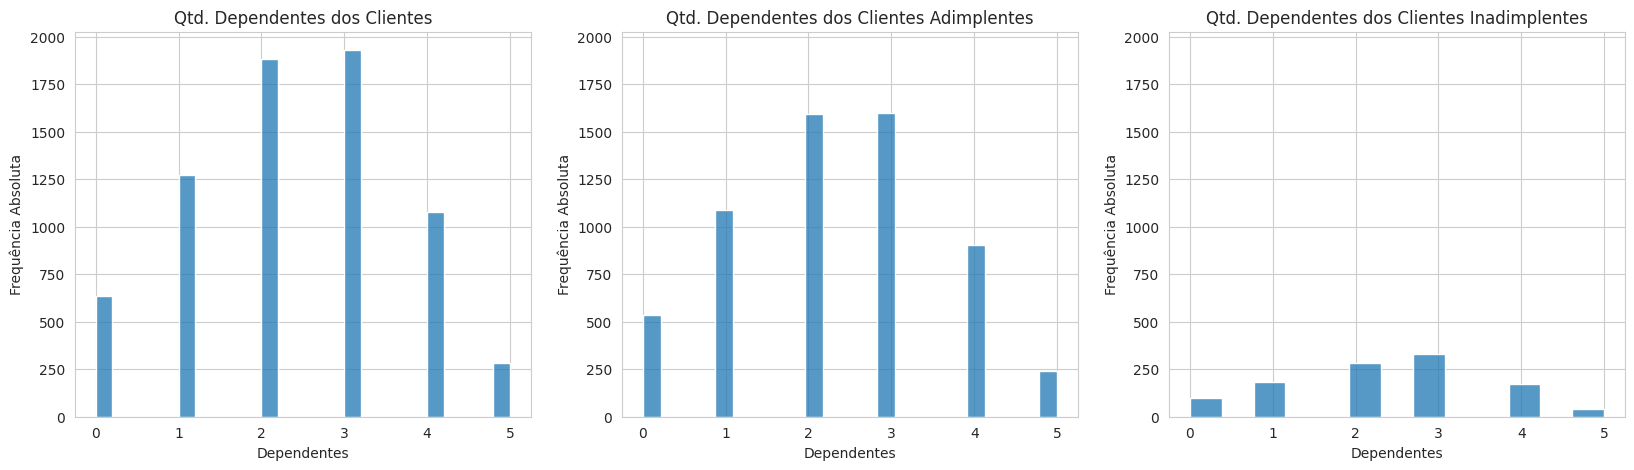

In [131]:
coluna = 'dependentes'
titulos = ['Qtd. Dependentes dos Clientes', 'Qtd. Dependentes dos Clientes Adimplentes', 'Qtd. Dependentes dos Clientes Inadimplentes']
criar_graficos_numericos(coluna=coluna, titulos=titulos, rotulos=False)

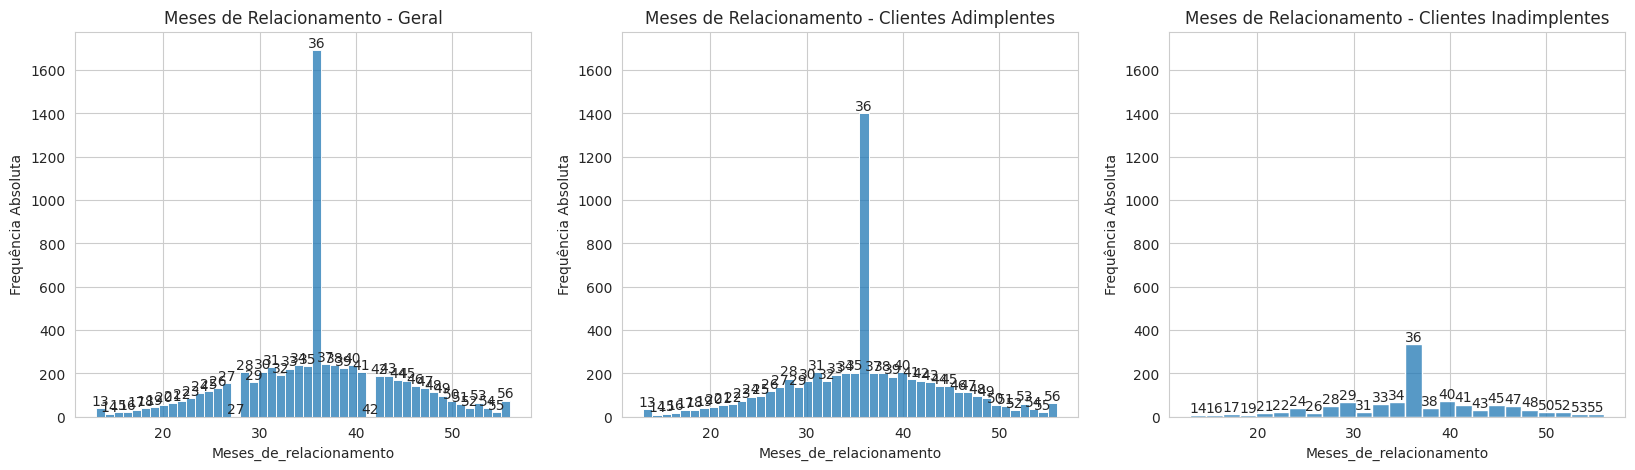

In [135]:
coluna = 'meses_de_relacionamento'
titulos = ['Meses de Relacionamento - Geral', 'Meses de Relacionamento - Clientes Adimplentes', 'Meses de Relacionamento - Clientes Inadimplentes']
criar_graficos_numericos(coluna=coluna, titulos=titulos, rotulos=True)

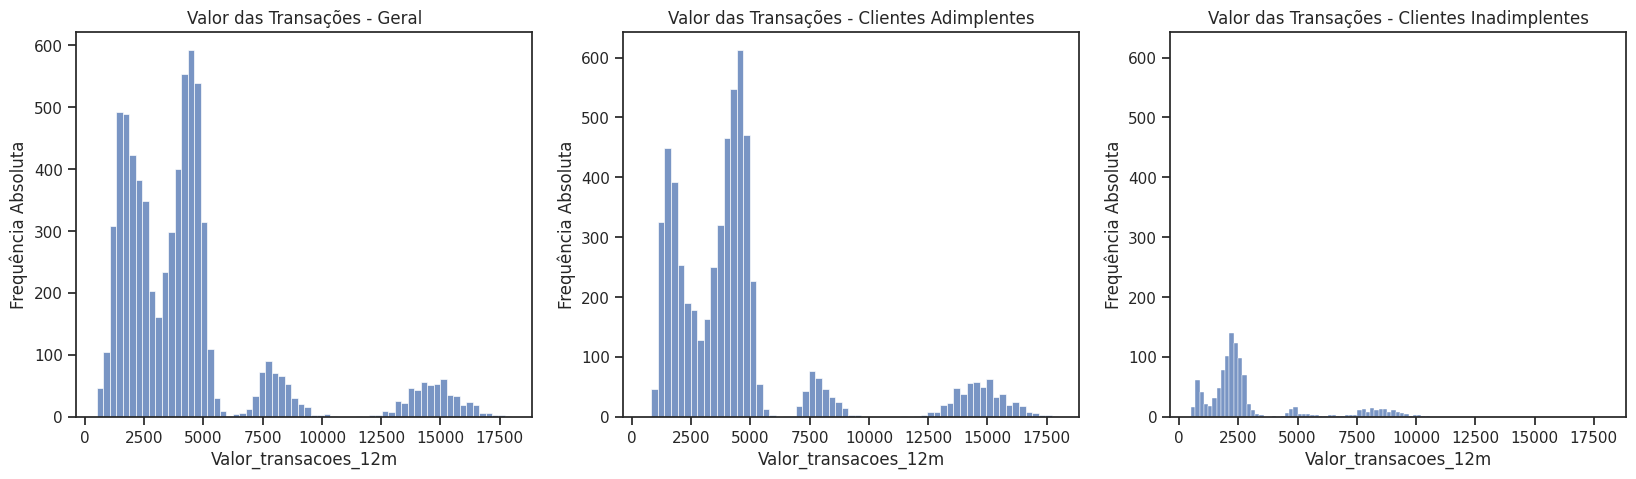

In [150]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações - Geral', 'Valor das Transações - Clientes Adimplentes', 'Valor das Transações - Clientes Inadimplentes']
criar_graficos_numericos(coluna=coluna, titulos=titulos, rotulos=False)

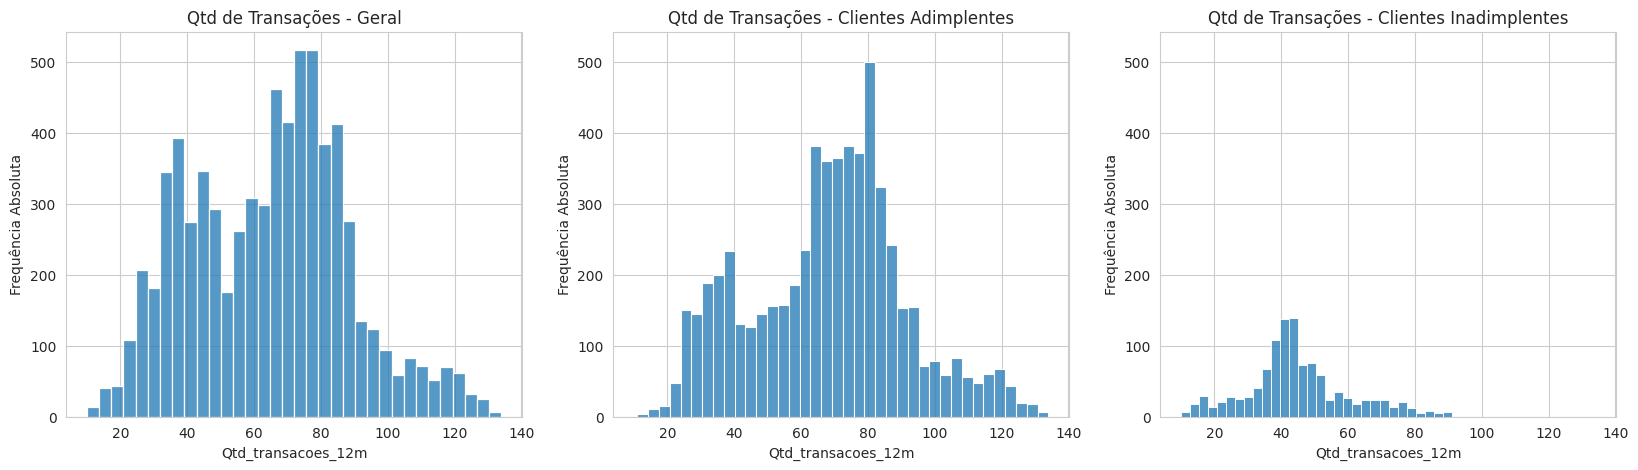

In [139]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd de Transações - Geral', 'Qtd de Transações - Clientes Adimplentes', 'Qtd de Transações - Clientes Inadimplentes']
criar_graficos_numericos(coluna=coluna, titulos=titulos, rotulos=False)

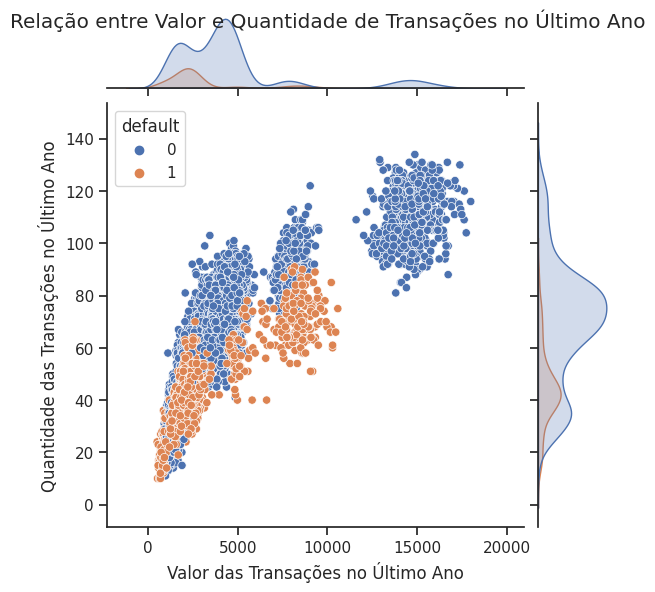

In [146]:
f = sns.jointplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set_axis_labels(
    'Valor das Transações no Último Ano',
    'Quantidade das Transações no Último Ano'
)
_ = f.fig.suptitle('Relação entre Valor e Quantidade de Transações no Último Ano')

plt.show()


### Resultado da análise dos gráficos - Dados Numéricos

Depois de análisar todos os gráficos foi possivel entender que a maioria dos dados presentes não seriam úteis para definir o perfil de um cliente possivelmente inadimplente. Por outro lado é possivel utilizar as colunas de Valor das transações nos ultimos 12 meses e Quantidade de transações nos ultimos 12 meses para entender e conseguir prever um possivel caso de inadimplencia.

Dessa maneira, uni ambos os dados para uma comparação. A partir disso, é possivel perceber que o grupo que possi maior quantidade de clientes inadimplentes é aquele que realiza até 100 transações ao ano e tem um valor limitado a R$10.000.

# Conclusão

Por meio desse estudo fui capaz de compreender que nem todos os dados dentro de um dataframe são úteis para realizar uma análise, e é necessário fazer uma pesquisa muito detalhada em cima dos mesmos para que se tenha certeza de quais informações utilizar.

Em questão do exercicio, foi possivel perceber que fatores ccomo idade, escolaridade, estado civil entre outros não afetam necessariamente a chance de um cliente se tornar inadimplente. Por outro lado é possivel traçar o perfil desse tipo de cliente por meio do valor médio e quantidade média das suas transações nos ultimos 12 meses. Com isso foi possivel entender que essa instituição financeira pode diminuir a quantidade de clientes inadimplentes se traçar uma estratégia que atinga exatamente o grupo que realiza uma média de 44 transações ao ano no valor médio de R$3100. A partir desses valores é possivel criar regras de negócio de abranjam esse grupo, tendo em consideração valores próximos a essa média.